Fa [[200.           0.           0.        ]
 [177.33333333   0.           0.        ]
 [162.32699259   0.           0.        ]
 ...
 [110.52631579   0.           0.        ]
 [110.52631579   0.           0.        ]
 [110.52631579   0.           0.        ]]


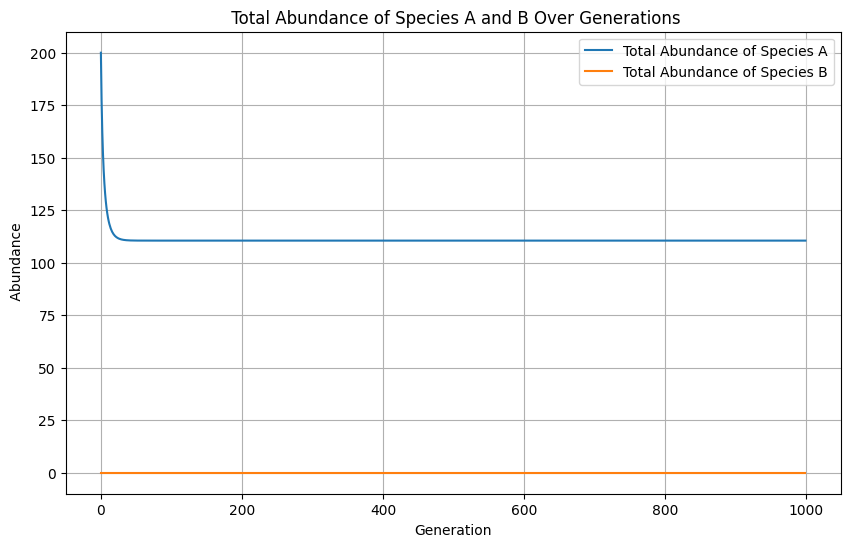

In [64]:
import numpy as np
import matplotlib.pyplot as plt

class SpeciesSimulation:
    def __init__(self, Ra, Rb, Ka, Kb, alpha, beta, Ma, Mb, Sa, Sb, initial_population, demes, generations):
        self.Ra = Ra
        self.Rb = Rb
        self.Ka = Ka
        self.Kb = Kb
        self.alpha = alpha
        self.beta = beta
        self.Ma = Ma
        self.Mb = Mb
        self.Sa = Sa
        self.Sb = Sb
        self.initial_population = initial_population
        self.demes = demes
        self.generations = generations
        
        # Initialize populations
        self.Fa = np.zeros((generations, demes))
        self.Fb = np.zeros((generations, demes))
        self.Fa[0,0] = initial_population
        # self.Fb[0,demes - 1] = initial_population
    
    def satyr_effect(self, Fa_g_c, Fb_g_c, Sa, Sb):
        if Fa_g_c + Fb_g_c * Sa != 0:
            satyr_A = Fa_g_c / (Fa_g_c + Fb_g_c * Sa)
        else:
            satyr_A = 1

        if Fb_g_c + Fa_g_c * Sb != 0:
            satyr_B = Fb_g_c / (Fb_g_c + Fa_g_c * Sb)
        else:
            satyr_B = 1
        return satyr_A, satyr_B
    
    
    
    def population_regulation(self, g, c):
        satyr_A, satyr_B = self.satyr_effect(self.Fa[g, c], self.Fb[g, c], self.Sa, self.Sb)
        population_regulation_A = (self.Ka - self.Fa[g, c] - self.alpha * self.Fb[g, c])/self.Ka
        population_regulation_B = (self.Kb - self.Fb[g, c] - self.beta * self.Fa[g, c])/self.Kb
        
        Fa_next = max(0, self.Fa[g, c]* (1 +  self.Ra * satyr_A * population_regulation_A ))
        Fb_next = max(0, self.Fb[g, c]*(1 +  self.Rb * satyr_B * population_regulation_B))

        return Fa_next, Fb_next

    
    '''
    def population_regulation(self, g, c):
        # Calculate population regulation factors        
        # Apply logistic growth formula
        Fa_next = self.Fa[g, c]*(1 + self.Ra * (1 - self.Fa[g, c] / self.Ka))


        
        # Ensure populations do not drop below zero
        # Fa_next = max(0, Fa_next)
        # Fb_next = max(0, Fb_next)
        
        # Debugging information
        print(f'g: {g}, c: {c}, Fa: {self.Fa[g, c]}, , Fa_next: {Fa_next}, {(1 - self.Fa[g, c] / self.Ka)}, ')
        
        return Fa_next
    '''
                      
    def migration(self, g, c):
   
        Fa_next_after_migration = self.Fa[g, c]
        Fb_next_after_migration = self.Fb[g, c]

        if c > 0:

            #emigration
            Fa_next_after_migration = self.Fa[g, c]*(1 - 0.5*self.Ma)
            Fb_next_after_migration = self.Fb[g, c]*(1 - 0.5*self.Mb)

            #immigration
            Fa_next_after_migration += 0.5 * Ma* self.Fa[g, c - 1]
            Fb_next_after_migration += 0.5 * Mb* self.Fb[g, c - 1]



        if c < self.demes - 1:

            Fa_next_after_migration = self.Fa[g, c]*(1 - 0.5*self.Ma)
            Fb_next_after_migration = self.Fb[g, c]*(1 - 0.5*self.Mb)


            Fa_next_after_migration += 0.5 * Ma* self.Fa[g, c + 1]
            Fb_next_after_migration += 0.5 * Mb* self.Fb[g, c + 1]

        return Fa_next_after_migration, Fb_next_after_migration
    
    def run_simulation(self):
        for g in range(self.generations - 1):
            for c in range(self.demes):
                self.Fa[g + 1, c], self.Fb[g + 1, c] = self.population_regulation(g, c)
                # self.Fa[g + 1, c] = self.population_regulation(g, c)

            for c in range(self.demes):
                self.Fa[g + 1, c], self.Fb[g + 1, c] = self.migration(g + 1, c)

        print("Fa" ,self.Fa)
 
    def plot_total_abundance(self):

        total_Fa = self.Fa.sum(axis=1)
        total_Fb = self.Fb.sum(axis=1)
    
        plt.figure(figsize=(10, 6))
        plt.plot(total_Fa, label='Total Abundance of Species A')
        plt.plot(total_Fb, label='Total Abundance of Species B')
        plt.xlabel('Generation')
        plt.ylabel(' Abundance')
        plt.title(' Total Abundance of Species A and B Over Generations')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    def plot_population_dynamics(self):
        vmin = 0
        vmax = max(self.Fa.max(), self.Fb.max())

        plt.figure(figsize=(12, 6))

        # Plot for Species A
        plt.subplot(1, 2, 1)
        plt.imshow(self.Fa.T, aspect='auto', origin='lower', vmin=vmin, vmax=vmax)
        plt.colorbar(label='Population of Species A')
        plt.xlabel('Generation')
        plt.ylabel('Deme')

        # Plot for Species B
        plt.subplot(1, 2, 2)
        plt.imshow(self.Fb.T, aspect='auto', origin='lower', vmin=vmin, vmax=vmax)
        plt.colorbar(label='Population of Species B')
        plt.xlabel('Generation')
        plt.ylabel('Deme')

        plt.tight_layout()
        plt.show()

# Parameters
Ra = 0.2
Rb = 0
Ka = 150
Kb = 150
alpha = beta = 0
Ma = 0.1
Mb = 0.1
Sa = 0
Sb = 0
initial_population = 200
demes = 3
generations = 1000

# Create and run the simulation
simulation = SpeciesSimulation(Ra, Rb, Ka, Kb, alpha, beta, Ma, Mb, Sa, Sb, initial_population, demes, generations)
simulation.run_simulation()

# Calculate and plot relative abundance
simulation.plot_total_abundance()

# Plot population dynamics
# simulation.plot_population_dynamics()
